# MASA Hackathon 2022
The endemic signified several things, but the most thrilling aspect was the ability to travel again. Border restrictions are being eased, and there is a trend towards ecotourism. Touchless service delivery, investing, diversifying, and changing to more sustainable tourist models are present, with social distancing and health and hygiene norms presumably in place.

Even at the endemic stage, every country has separate quarantine and healthcare policies. The last thing you will expect on vacation is being delayed at immigration owing to vaccination permits, contracting Covid-19 at a foreign country or having your flight cancelled at the last minute. But what if it that happens? A travel insurance policy will provide you and your family with peace of mind in knowing that you are insured.

## Data Dictionary
Row: 63326 rows

Columns: 11 columns
- Agency: 16 types 'XXX'
- Agency Type: Airlines/Travel Agency
- Distribution Channel: Online/Offline
- Product Name: 26 types
- Claim: Yes/No
- Duration: -2 to 4881
- Destination: 149 countries
- Net Sale: -389 to 810
- Commision: 0 to 283.5
- Gender: F/M
- Age: 0 to 118

## Load Library

In [194]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [195]:
# Format code to pep8 standard
# Type in terminal: autopep8 --in-place -a -a Testing01.ipynb

## Data Analysis

In [196]:
# Read data
df = pd.read_csv('Dataset/Travel Insurance.csv')
df.shape

(63326, 11)

In [197]:
# Display the column name
df.columns 

Index(['Agency', 'AgencyType', 'DistributionChannel', 'ProductName', 'Claim',
       'Duration', 'Destination', 'NetSales', 'Commision', 'Gender', 'Age'],
      dtype='object')

In [198]:
# First five rows of the data
df.head()

,Agency,AgencyType,DistributionChannel,ProductName,Claim,Duration,Destination,NetSales,Commision,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [199]:
# The T is inverting the position of the columns name and the statistics column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,63326.0,49.317074,101.791566,-2.0,9.0,22.00,53.00,4881.0
NetSales,63326.0,40.702018,48.845637,-389.0,18.0,26.53,48.00,810.0
Commision,63326.0,9.809992,19.804388,0.0,0.0,0.00,11.55,283.5
Age,63326.0,39.969981,14.017010,0.0,35.0,36.00,43.00,118.0


In [200]:
# The count and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Agency               63326 non-null  object 
 1   AgencyType           63326 non-null  object 
 2   DistributionChannel  63326 non-null  object 
 3   ProductName          63326 non-null  object 
 4   Claim                63326 non-null  object 
 5   Duration             63326 non-null  int64  
 6   Destination          63326 non-null  object 
 7   NetSales             63326 non-null  float64
 8   Commision            63326 non-null  float64
 9   Gender               18219 non-null  object 
 10  Age                  63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [201]:
df['Age'].describe()

count    63326.000000
mean        39.969981
std         14.017010
min          0.000000
25%         35.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

In [202]:
df.columns

Index(['Agency', 'AgencyType', 'DistributionChannel', 'ProductName', 'Claim',
       'Duration', 'Destination', 'NetSales', 'Commision', 'Gender', 'Age'],
      dtype='object')

In [203]:
# Group by & Count distinct row
df.Agency.value_counts()
df.AgencyType.value_counts()
df.DistributionChannel.value_counts()
df.ProductName.value_counts()
df.Claim.value_counts()
df.Duration.value_counts()
df.Destination.value_counts()
df.NetSales.value_counts()
df.Commision.value_counts()
df.Gender.value_counts()
df.Age.value_counts()

36    24142
31     2663
48     2405
35     2348
30     1341
      ...  
3         4
5         3
0         2
4         1
2         1
Name: Age, Length: 89, dtype: int64

# Statistical Test

## Simple linear regression analysis

### Relationship between Duration & Net Sales

In [204]:
# Make a copy of data
# Keep Duration & Net Sales only
dftest1_features = ['Duration','NetSales']
dftest1 = df[dftest1_features]

# Check deleted columns
dftest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  63326 non-null  int64  
 1   NetSales  63326 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 989.6 KB


In [205]:
dftest1.describe()

,Duration,NetSales
count,63326.000000,63326.000000
mean,49.317074,40.702018
std,101.791566,48.845637
min,-2.000000,-389.000000
25%,9.000000,18.000000
50%,22.000000,26.530000
75%,53.000000,48.000000
max,4881.000000,810.000000


Estimated coefficients:
b_0 = 30.54406602637408            
b_1 = 0.2059723177332796


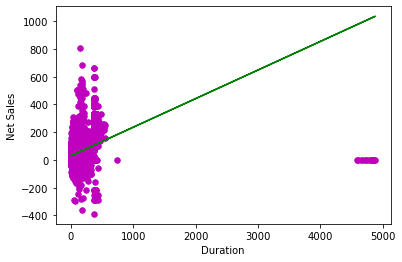

In [206]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('Duration')
    plt.ylabel('Net Sales')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = dftest1['Duration']
    y = dftest1['NetSales']
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()

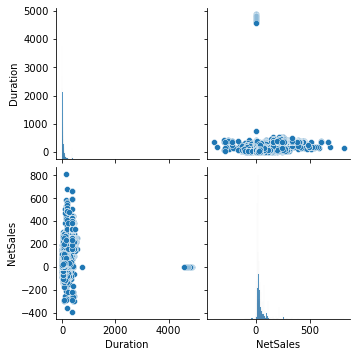

In [207]:
# Relationship of dataset
sns.pairplot(dftest1)

### Relationship between Age & Net Sales

In [208]:
# Make a copy of data
# Keep Age & Net Sales only
dftest2_features = ['Age','NetSales']
dftest2 = df[dftest2_features]

# Check deleted columns
dftest2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       63326 non-null  int64  
 1   NetSales  63326 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 989.6 KB


Estimated coefficients:
b_0 = 35.44317188927522            
b_1 = 0.1315698928189223


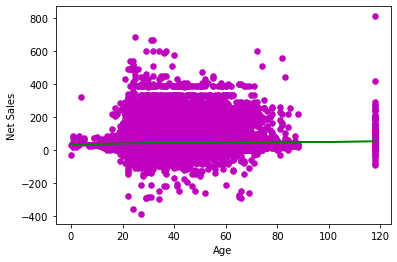

In [209]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('Age')
    plt.ylabel('Net Sales')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = dftest2['Age']
    y = dftest2['NetSales']
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()

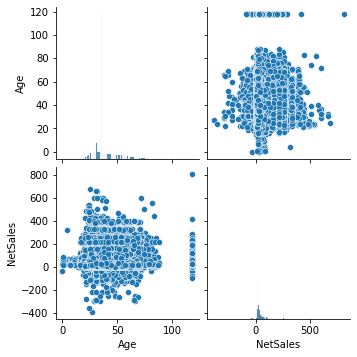

In [210]:
# Relationship of dataset
sns.pairplot(dftest2)

### Relationship between Age & Duration

In [211]:
dftest3_features = ['Age','Duration']
dftest3 = df[dftest3_features]

dftest3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       63326 non-null  int64
 1   Duration  63326 non-null  int64
dtypes: int64(2)
memory usage: 989.6 KB


Estimated coefficients:
b_0 = 48.6005888586795            
b_1 = 0.01792557024140592


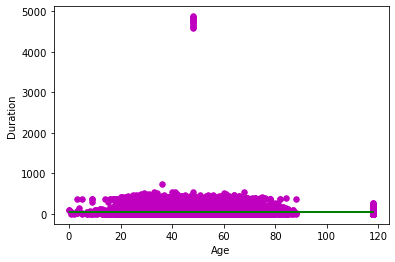

In [212]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('Age')
    plt.ylabel('Duration')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = dftest3['Age']
    y = dftest3['Duration']
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()

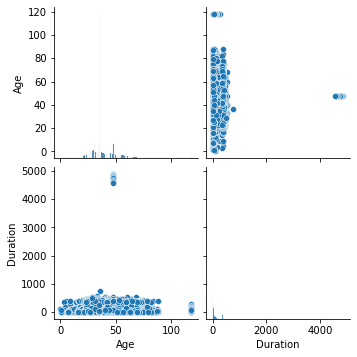

In [213]:
sns.pairplot(dftest3)

## Multiple linear regression analysis

### Relationship between Age & Duration & Net Sales

In [214]:
dftest4_features = ['Age','Duration','NetSales']
dftest4 = df[dftest4_features]
dftest4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       63326 non-null  int64  
 1   Duration  63326 non-null  int64  
 2   NetSales  63326 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


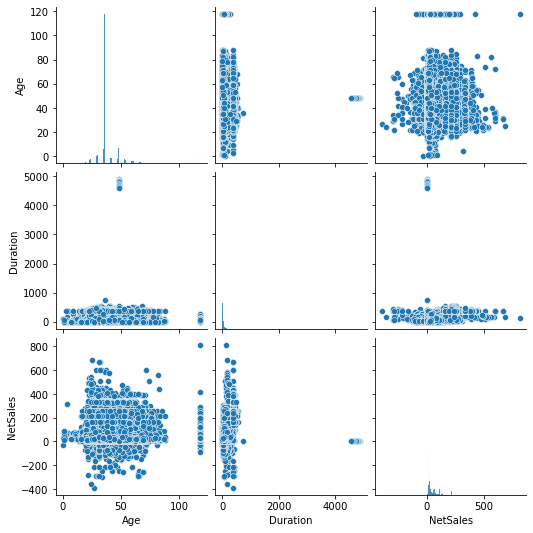

In [215]:
# Relationship of dataset
sns.pairplot(dftest4)

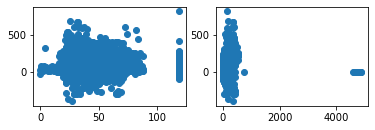

In [216]:
dftest5_features = ['Age','Duration']
X = df[dftest5_features]
y = df.NetSales

plt.subplot(2,2,1)
plt.scatter(X['Age'],y)
plt.subplot(2,2,2)
plt.scatter(X['Duration'],y)

Text(0.5, 0, 'Net Sales')

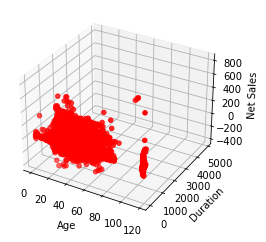

In [217]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x1 = X['Age']
x2 = X['Duration']

ax.scatter(x1,x2,y,c='red',marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Net Sales')

In [218]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X,y)

LinearRegression()

In [219]:
theta0 = mlr_model.intercept_
theta1, theta2 = mlr_model.coef_
theta0,theta1,theta2

(25.4349084708817, 0.1278785007368896, 0.205928850934094)

In [220]:
y_pred = mlr_model.predict([[50,500]])
y_pred

array([134.79325897])